In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# load the data 
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Exited 1 => customer left the bank
- Exited 0 => customer not left the bank

In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# dropping RowNumber , CustomerId and Surname
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(data = df , columns = ['Gender' , 'Geography'] , drop_first = True , dtype = int)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
X = df.drop(columns = ['Exited'] , axis = 1)
y = df['Exited']

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [20]:
# do the scaling cause some columns values are very high and some are very low 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

In [21]:
X_train.shape

(8000, 11)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]], shape=(8000, 11))

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

# make a Neural Network with 1 input layer , 1 hidden layer and 1 output layer
model.add(Dense(units = 3 , activation = 'sigmoid' , input_dim = 11)) # adding 1 hidden layer with 3 neuron
model.add(Dense(units = 1 , activation = 'sigmoid')) # adding 1 output layer

In [27]:
# view the model summary 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compile the model -> add loss function , optimizer and other metrices
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam')

In [33]:
model.fit(x = X_train_scaled , y = y_train , epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4818
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4620
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4507
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4429
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4373
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4332
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4302
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4280
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4262
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4247


In [34]:
# view the weights of 0-th layer
model.layers[0].get_weights()

[array([[ 0.11204989,  0.01383032,  0.13266715],
        [-1.1110698 ,  2.0518792 , -2.6059442 ],
        [ 0.05497386, -0.06666818, -0.04490494],
        [-0.34760037,  0.776605  ,  0.41242978],
        [ 0.19341901, -0.02008987,  0.09262751],
        [ 0.10383829, -0.23690638, -0.21075146],
        [ 1.4720986 , -0.72072375,  0.28741515],
        [-0.05949605, -0.12154095, -0.38787693],
        [ 0.73581856, -0.66345304,  0.20734043],
        [-1.0943094 ,  0.61445606, -0.4592988 ],
        [ 0.03342663,  0.12396095,  0.080004  ]], dtype=float32),
 array([ 0.63273025, -0.2856902 ,  0.2347525 ], dtype=float32)]

In [35]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
y_pred

array([[0.14201833],
       [0.10732435],
       [0.14382811],
       ...,
       [0.06318643],
       [0.11657168],
       [0.4208907 ]], shape=(2000, 1), dtype=float32)

In [38]:
y_pred = np.where(y_pred > 0.5 , 1 , 0)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8035

In [40]:
# using relu as activation function 
model1 = Sequential()

# make a Neural Network with 1 input layer , 1 hidden layer and 1 output layer
model1.add(Dense(units = 10 , activation = 'relu' , input_dim = 11)) # adding 1 hidden layer with 10 neuron
# adding another layer
model1.add(Dense(units = 10 , activation = 'relu'))
model1.add(Dense(units = 1 , activation = 'relu')) # adding 1 output layer

In [41]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model1.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [49]:
model1.fit(x = X_train_scaled , y = y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8509 - loss: 0.3531 - val_accuracy: 0.8556 - val_loss: 0.3678
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8497 - loss: 0.3513 - val_accuracy: 0.8556 - val_loss: 0.3571
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8520 - loss: 0.3485 - val_accuracy: 0.8531 - val_loss: 0.3735
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8523 - loss: 0.3466 - val_accuracy: 0.8544 - val_loss: 0.3828
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.3461 - val_accuracy: 0.8519 - val_loss: 0.3823
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.3470 - val_accuracy: 0.8525 - val_loss: 0.3836
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3446 - val_accuracy: 0.8562 - val_loss: 0.3891
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3446 - val_accu

In [50]:
y_pred = model1.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [51]:
y_pred = np.where(y_pred > 0.5 , 1 , 0)

In [52]:
accuracy_score(y_test , y_pred)

0.8615

In [53]:
# saving the model's training history

model2 = Sequential()
model2.add(Dense(11 , activation = 'relu' , input_dim = 11)) # input layer
model2.add(Dense(11 , activation = 'relu')) # hidden layer - 01
model2.add(Dense(11 , activation = 'relu')) # hidden layer - 02
model2.add(Dense(1 , activation = 'relu')) # output layer

In [54]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model2.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [56]:
history = model2.fit(X_train_scaled , y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6969 - loss: 1.9707 - val_accuracy: 0.7306 - val_loss: 1.3427
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7475 - loss: 1.1430 - val_accuracy: 0.7325 - val_loss: 0.9241
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7664 - loss: 0.7948 - val_accuracy: 0.7494 - val_loss: 0.6085
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.5692 - val_accuracy: 0.7900 - val_loss: 0.5452
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.5229 - val_accuracy: 0.6888 - val_loss: 0.6059
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7688 - loss: 0.5324 - val_accuracy: 0.7906 - val_loss: 0.5060
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7973 - loss: 0.4825 - val_accuracy: 0.7944 - val_loss: 0.4907
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4791 - val_accu

In [57]:
history

In [58]:
history.history

{'accuracy': [0.6968749761581421,
  0.7475000023841858,
  0.766406238079071,
  0.7875000238418579,
  0.7945312261581421,
  0.768750011920929,
  0.7973437309265137,
  0.7970312237739563,
  0.7959374785423279,
  0.7995312213897705,
  0.8004687428474426,
  0.8028125166893005,
  0.8031250238418579,
  0.8045312762260437,
  0.8090624809265137,
  0.8100000023841858,
  0.8167187571525574,
  0.8201562762260437,
  0.8245312571525574,
  0.8118749856948853,
  0.8356249928474426,
  0.81640625,
  0.7746875286102295,
  0.8364062309265137,
  0.8426562547683716,
  0.8357812762260437,
  0.8446875214576721,
  0.8470312356948853,
  0.8481249809265137,
  0.8482812643051147,
  0.8492187261581421,
  0.8521875143051147,
  0.8528125286102295,
  0.8529687523841858,
  0.8529687523841858,
  0.8482812643051147,
  0.8539062738418579,
  0.8550000190734863,
  0.8568750023841858,
  0.8571875095367432,
  0.8556249737739563,
  0.8521875143051147,
  0.8551562428474426,
  0.8556249737739563,
  0.8573437333106995,
  0.8571

In [59]:
history.model

<Sequential name=sequential_2, built=True>

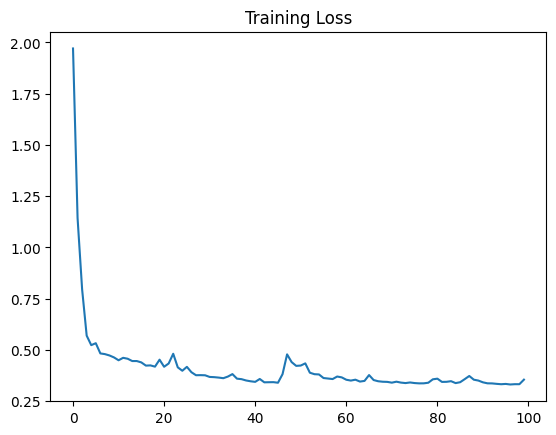

In [61]:
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.show()

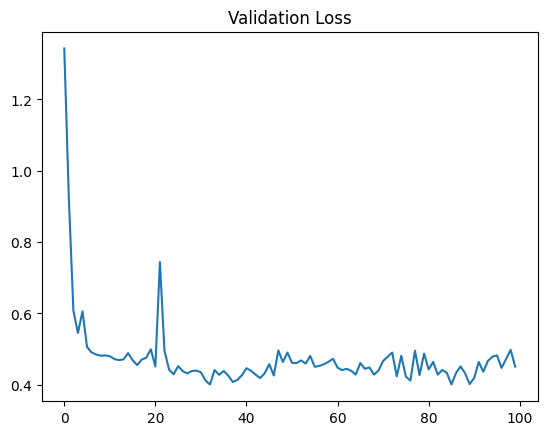

In [62]:
plt.plot(history.history['val_loss'])
plt.title("Validation Loss")
plt.show()

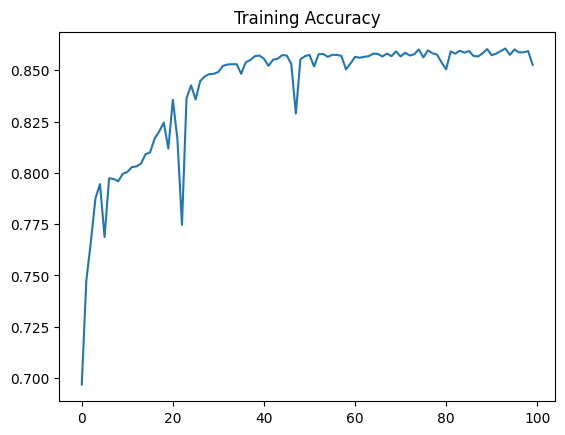

In [63]:
plt.plot(history.history['accuracy'])
plt.title("Training Accuracy")
plt.show()

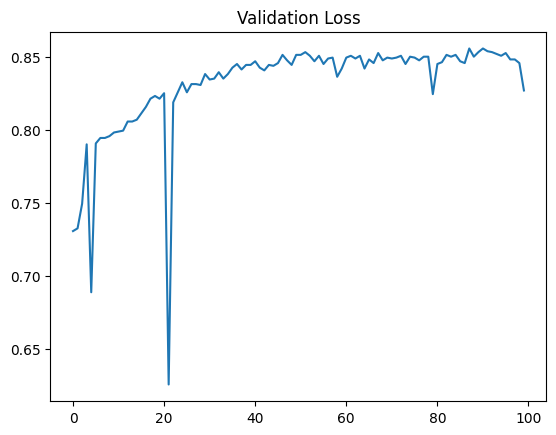

In [65]:
plt.plot(history.history['val_accuracy'])
plt.title("Validation Loss")
plt.show()

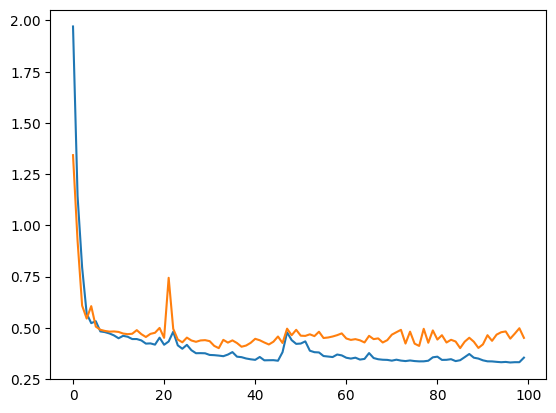

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

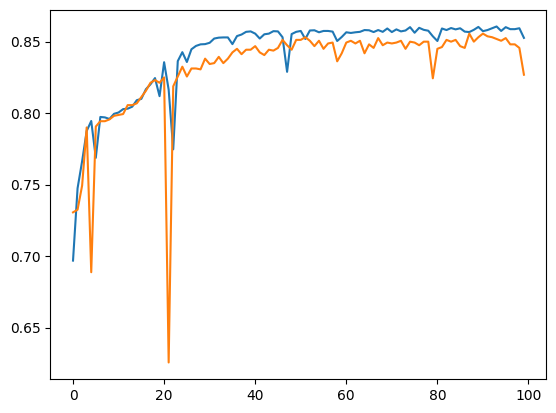

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])